In [49]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

### knn 회귀 분석을 통해 농어에 대한 무게를 예측하는 프로그램을 구현

#### 머신러닝 구현
1. 데이터 전처리 - Nan, 0, 단위(눈금 등)처리, 훈련세트/테스트세트
2. 데이터 학습시키기  - KNR 
3. 데이터 예측하기 -  평균 절대값 오차
4. 예측값 (cf.KNN : 정답률)

In [50]:
# np 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [20]:
# 판다스 DataFrame으로 변환
perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]

df =pd.DataFrame([perch_length,perch_weight])
df = df.T
# df

Text(0, 1, '무게')

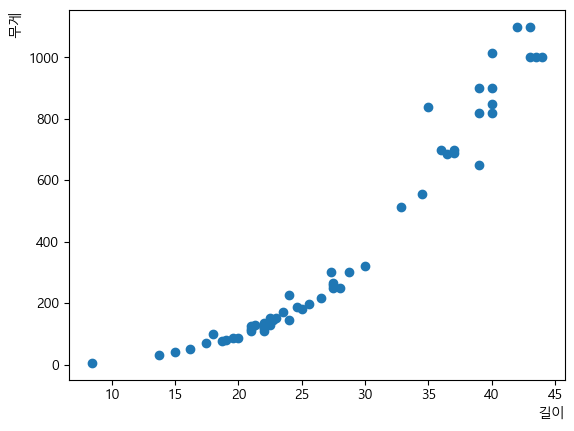

In [51]:
# 산점도로 출력
# x축은 길이, y축은 무게
# plt.scatter(df[0],df[1])
plt.scatter(perch_length,perch_weight)
plt.xlabel('길이',loc='right')
plt.ylabel('무게',loc='top')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       56 non-null     float64
 1   1       56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [52]:
# train_input, test_input, train_target, test_target = train_test_split(df[0],df[1])
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight)
train_input

array([25.6, 18.7, 15. , 22.5, 28. , 22. , 39. , 37. , 28.7, 22.5, 39. ,
       24.6, 21. , 44. , 24. , 27.3, 36. , 23. , 19. , 36.5, 27.5, 27.5,
       34.5, 22.7, 21. , 20. , 22. , 30. , 22. , 35. , 32.8, 37. , 39. ,
       42. , 40. , 40. , 40. , 43.5, 17.4, 23.5, 13.7, 21. ])

In [48]:
arr1 = np.array([1,2,3,4,5,6])  # numpy 행렬로 변환
arr1 = arr1.reshape(2,3)  # 2행2열  / 2행3열
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
# [1,2,3,4]
# [[1],[2],[3],[4]]

arr1 = np.array([1,2,3,4])
arr1 = arr1.reshape(-1,1)  # -1 : 모두  (-1,1) = (6,1)  # 행렬의 모양을 변경
arr1

array([[1],
       [2],
       [3],
       [4]])

In [55]:
# 알고리즘 구현을 위한 2차원 행렬로 변경
# reshape  :  Series -> 2차원 DF형태로변환, 특성이 2개 이상이면 reshape을 할 필요가 없다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [28]:
train_input.shape

(42, 1)

In [33]:
# 총개수 :  56

train_input.shape  # 42
# test_input  # 14

(42, 1)

In [ ]:
knr = KNeighborsRegressor()

In [56]:
# 데이터 학습시키기

knr.fit(train_input,train_target)

KNeighborsRegressor()

In [57]:
# 예측률 측정하기 - test_input 데이터 검증
score = knr.score(test_input,test_target)
score

0.9748940682569507

In [61]:
# 실제 train데이터의 예측률은 어느 정도 나오는지 확인
score2 = knr.score(train_input, train_target)
print("train예측률 :", score2)

train예측률 : 0.9755217121455199


In [58]:
# 데이터 예측하기
# 예측의 오차범위 - 평균 절대값 오차

from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게 예측
print("예측값 :", predict)

예측값 : [ 60.  175.6 964.  131.   84.6 858.  131.  121.   60.  964.   93.6 186.
 272.  251.4]


In [59]:
score = knr.score(test_input, test_target)
print("예측률 :",score)

예측률 : 0.9748940682569507


In [41]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [60]:
# 예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target, predict)
print("오차범위 :", test_mean)

오차범위 : 37.4


### 그래프 구성

In [64]:
# 이웃의 개수를 축소  : 5-> 3으로 변경
# 과소적합의 부분 문제를 해결

# 과소적합은 n_neighbors를 줄임
# 과대적합은 n_neighbors를 늘림

knr.n_neighbors = 3
# 데이터 훈련을 다시 시키기
knr.fit(train_input, train_target)
# train 데이터 예측, test 데이터 예측
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9773099021144125
0.9813487986438183


In [67]:
len(perch_length)

56

In [68]:
arr = [[i] for i in range(5,45+1)] # x축 좌표
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

In [69]:
np.arange(4,45)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44])

In [70]:
np.arange(5,45).reshape(-1,1)

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [ ]:
# 원래의 산점도
plt.scatter(train_input, train_target)

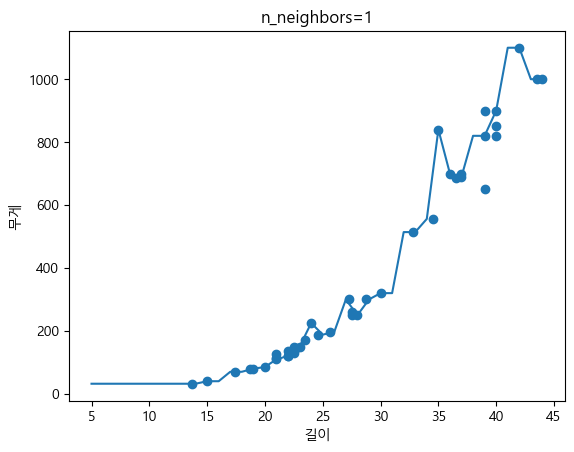

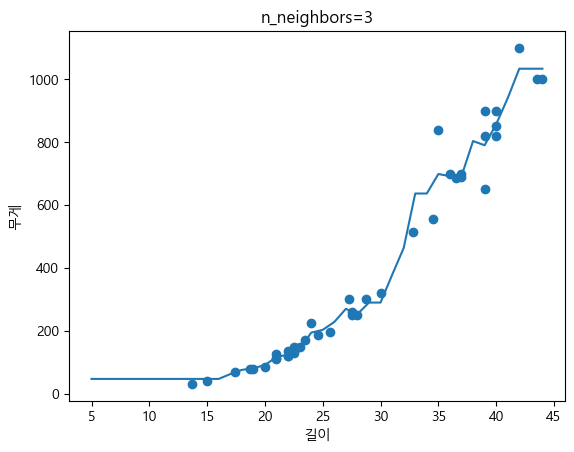

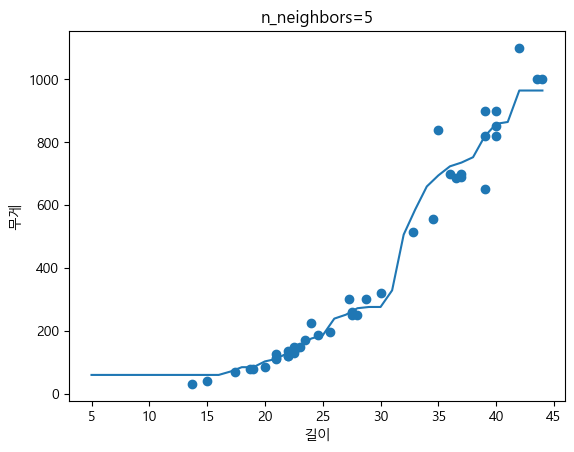

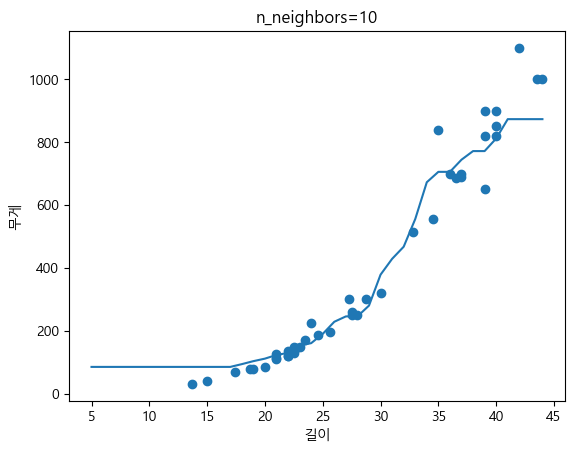

In [74]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,3,5,10]: # n_neighbors  = 1,5,10 예측률을 그래프로 표시
    knr.n_neighbors = n
    
    # 데이터 훈련을 다시 시키기
    knr.fit(train_input, train_target)    
    
    # 배열로 만든 길이를 가지고 예측무게 산출 -> 길이(x)에서 예측값(y)을 찾아냄
    predict = knr.predict(x)

    # 훈련세트의 값을 먼저 출력
    plt.scatter(train_input, train_target)
    plt.plot(x,predict)
    plt.title('n_neighbors={}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()